In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [17]:
file_loc = "D:/Python/Datasets/ml-1m/users.dat"
usersdat = pd.read_csv(file_loc, header=None, delimiter='::')
usersdat.columns = ['UserID', 'Gender','Age', 'Occupation','Zip-code']
usersdat.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [18]:
file_loc2 = "D:/Python/Datasets/ml-1m/movies.dat"
moviesdat = pd.read_csv(file_loc2, header=None, delimiter='::')
moviesdat.columns = ['MovieID', 'Title','Genres']
moviesdat.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
file_loc3 = "D:/Python/Datasets/ml-1m/ratings.dat"
ratingsdat = pd.read_csv(file_loc3, header=None, delimiter='::')
ratingsdat.columns = ['UserID', 'MovieID','Rating', 'Timestamp']
ratingsdat.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [23]:
## Check for any Null values in datasets
usersdat.isnull().sum()
ratingsdat.isnull().sum()
moviesdat.isnull().sum()

a = moviesdat.Genres.isnull()
a[a==True]
moviesdat[3772:3776]

,MovieID,Title,Genres
3772,3842,Make Them Die Slowly (Cannibal Ferox) (1980),Horror
3773,3843,Sleepaway Camp (1983),Horror
3774,3844,Steel Magnolias (1989),Drama
3775,3845,And God Created Woman (Et Dieu&#8230;Créa la F...,Drama


In [ ]:
## There will be 2 unified sets: 
## 1) ratingsWithMultipleGenres = Users, Ratings, Movies with Genres intact
## 2) ratingsWithUniqueGenres   = Users, Ratings, Movies with Genres split as unique rows
usersdat['UserID'] = usersdat['UserID'].astype(int)
ratingsWithMultipleGenres = pd.merge(pd.merge(ratingsdat, usersdat), moviesdat)
ratingsWithMultipleGenres.tail()

**Break the Movies data set such that each row for a movie has 1 Genre**

In [60]:
ratingsWithUniqueGenres = pd.DataFrame(moviesdat.Genres.str.split('|').tolist(), index=moviesdat.MovieID).stack()
ratingsWithUniqueGenres  = ratingsWithUniqueGenres.reset_index()[[0, 'MovieID']] 
ratingsWithUniqueGenres.columns = ['Genres', 'MovieID']
ratingsWithUniqueGenres.tail()

,Genres,MovieID
6403,Drama,3949
6404,Drama,3950
6405,Drama,3951
6406,Drama,3952
6407,Thriller,3952


### Merge with rest of the data to produce a unified dataset

In [64]:
ratingsWithUniqueGenres = pd.merge(pd.merge(ratingsdat,usersdat),pd.merge(ratingsWithUniqueGenres,moviesdat))
ratingsWithUniqueGenres.sort(['Title']).tail()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Genres,Title
88828,1701,1426,4,974708114,F,25,4,97233,Children's,Zeus and Roxanne (1997)
103210,1948,1426,1,974692386,M,1,10,93111,Children's,Zeus and Roxanne (1997)
215597,4150,1426,2,965344367,M,25,0,29672,Children's,Zeus and Roxanne (1997)
113455,2116,1426,2,974650074,M,18,4,49546,Children's,Zeus and Roxanne (1997)
162141,3217,1426,3,968785000,F,35,0,92630,Children's,Zeus and Roxanne (1997)


In [35]:
#1. What are the 25 most rated movies?
top25 = ratingsWithMultipleGenres.Title.value_counts()[:25]
top25

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [79]:
#2. Which movies are most highly rated?
highlyRated = ratingsWithMultipleGenres.groupby('Title').agg({'Rating': [np.size, np.mean]})
highlyRated.head()

Rating          
                                size      mean
Title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [69]:
# Ensure the movie has at least been rated a 100 times
atleast_100 = highlyRated['Rating']['size'] >= 100

highlyRated[atleast_100].sort_values([('Rating', 'mean')], ascending=False)[:15]
most_50 = ratingsWithMultipleGenres.groupby('MovieID').size().sort_values(ascending=False)[:50]
most_50

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
356     2194
2716    2181
296     2171
1240    2098
1       2077
1214    2024
2916    1996
457     1995
3578    1924
1200    1820
541     1800
2987    1799
1259    1785
50      1783
34      1751
2791    1731
780     1730
3175    1728
1193    1725
919     1718
924     1716
1127    1715
2355    1703
1387    1697
1221    1692
dtype: int64

In [65]:
#3. Which movies do men and women most disagree on?
ratingsWithMultipleGenres.reset_index('MovieID', inplace=True)
pivotData = ratingsWithMultipleGenres.pivot_table(index=['MovieID', 'Title'],
                           columns=['Gender'],
                           values='Rating',
                           fill_value=0)



ValueError: cannot insert level_0, already exists

In [68]:
pivotData.head()
pivotData['difference'] = pivotData.M - pivotData.F
pivotData.reset_index('MovieID', inplace=True)

disagreements = pivotData[pivotData.MovieID.isin(most_50.index)]['difference']
disagreements[1:15]

33    -0.092446
49     0.004931
106    0.281355
253    0.192371
287    0.274883
309    0.021550
346    0.060775
443    0.003590
466    0.234791
513   -0.071187
527    0.225962
575    0.330279
579    0.109990
593    0.050124
Name: difference, dtype: float64

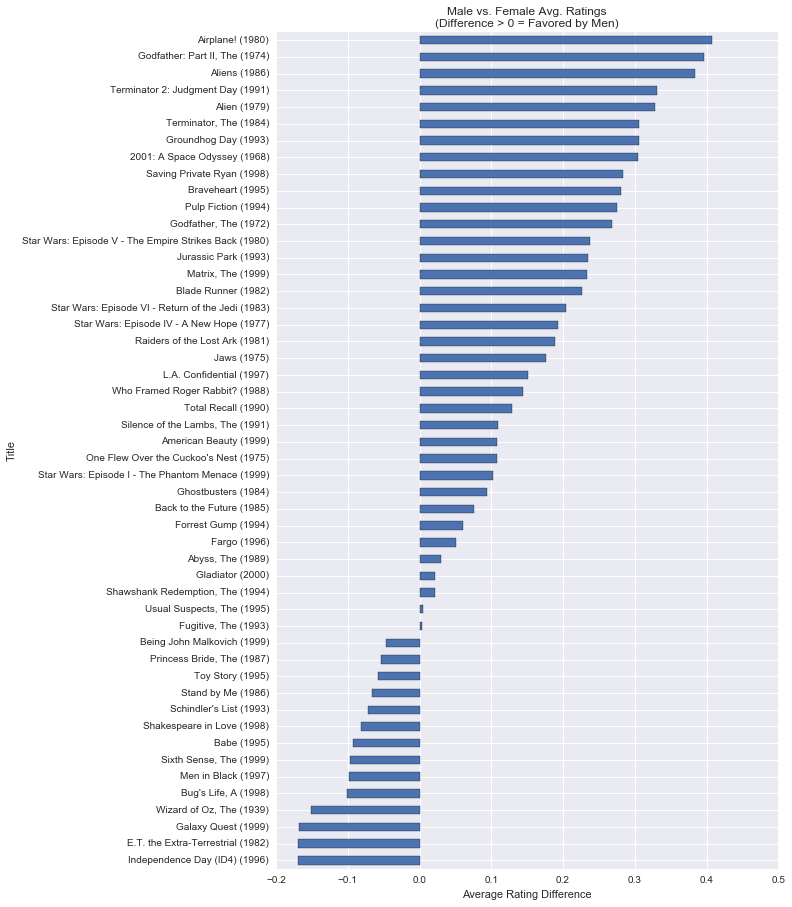

In [47]:
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [53]:
ratingsWithUniqueGenres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310699 entries, 0 to 310698
Data columns (total 10 columns):
UserID        310699 non-null int64
MovieID       310699 non-null int64
Rating        310699 non-null int64
Timestamp     310699 non-null int64
Gender        310699 non-null object
Age           310699 non-null int64
Occupation    310699 non-null int64
Zip-code      310699 non-null object
Genres        310699 non-null object
Title         310699 non-null object
dtypes: int64(6), object(4)
memory usage: 26.1+ MB


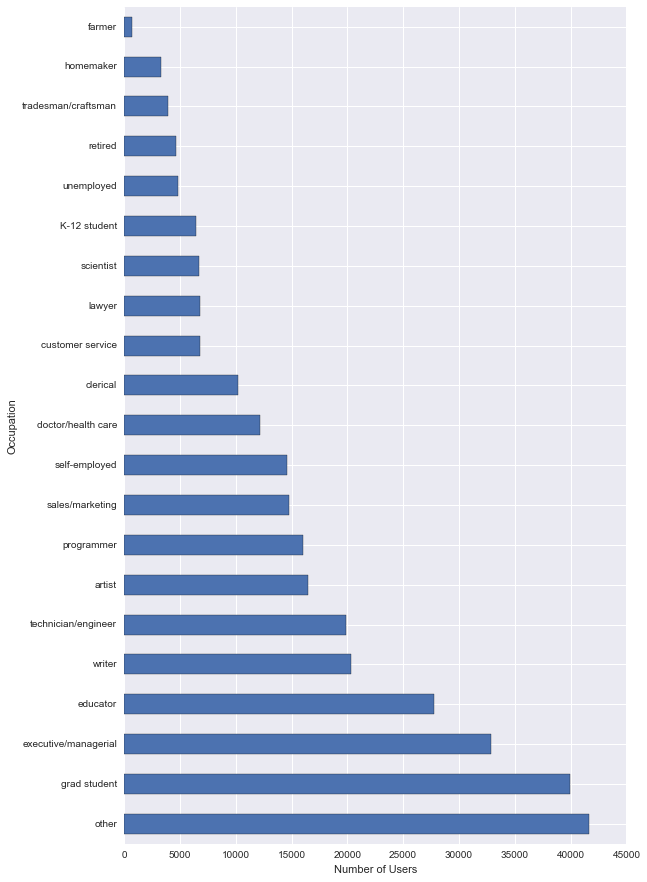

In [71]:
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 0, 'Occupation'] = 'other'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 1, 'Occupation'] = 'educator'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 2, 'Occupation'] = 'artist'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 3, 'Occupation'] = 'clerical'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 4, 'Occupation'] = 'grad student'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 5, 'Occupation'] = 'customer service'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 6, 'Occupation'] = 'doctor/health care'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 7, 'Occupation'] = 'executive/managerial'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 8, 'Occupation'] = 'farmer'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 9, 'Occupation'] = 'homemaker'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 10, 'Occupation'] = 'K-12 student'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 11, 'Occupation'] = 'lawyer'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 12, 'Occupation'] = 'programmer'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 13, 'Occupation'] = 'retired'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 14, 'Occupation'] = 'sales/marketing'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 15, 'Occupation'] = 'scientist'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 16, 'Occupation'] = 'self-employed'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 17, 'Occupation'] = 'technician/engineer'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 18, 'Occupation'] = 'tradesman/craftsman'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 19, 'Occupation'] = 'unemployed'
ratingsWithUniqueGenres.loc[ratingsWithUniqueGenres['Occupation']== 20, 'Occupation'] = 'writer'
ratingsWithUniqueGenres['Occupation'].value_counts().plot(kind='barh', figsize=[9, 15], stacked=True)
plt.ylabel('Occupation')
plt.xlabel('Number of Users');

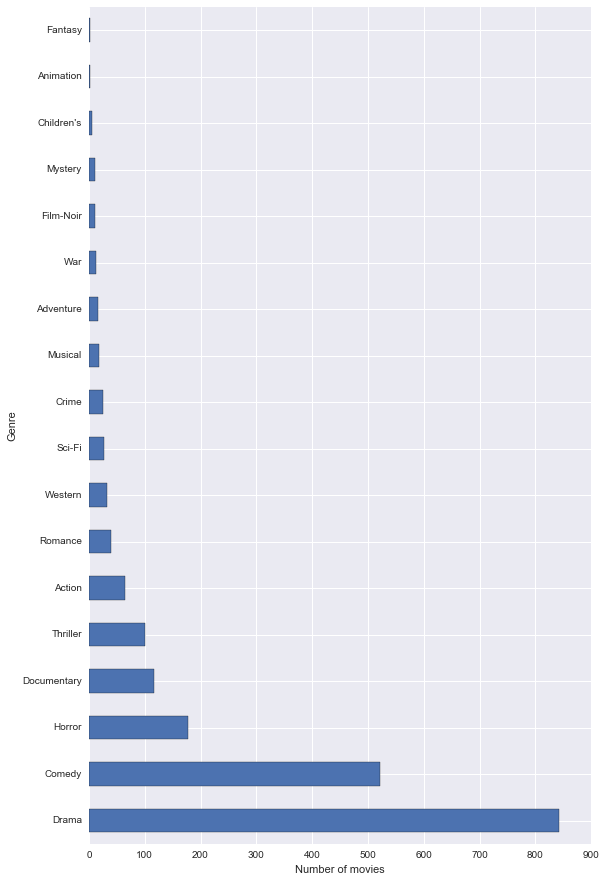

In [56]:
# Horizontal bar chart - GENRE
movieStats = pd.DataFrame(moviesdat.Genres.str.split('|').tolist(), index=moviesdat.MovieID).stack()
movieStats  = movieStats.reset_index()[[0, 'MovieID']] 
movieStats.columns = ['Genres', 'MovieID']
movieStats = pd.merge(movieStats,moviesdat)
movieStats['Genres'].value_counts().plot(kind='barh', figsize=[9, 15], stacked=True)
plt.ylabel('Genre')
plt.xlabel('Number of movies');

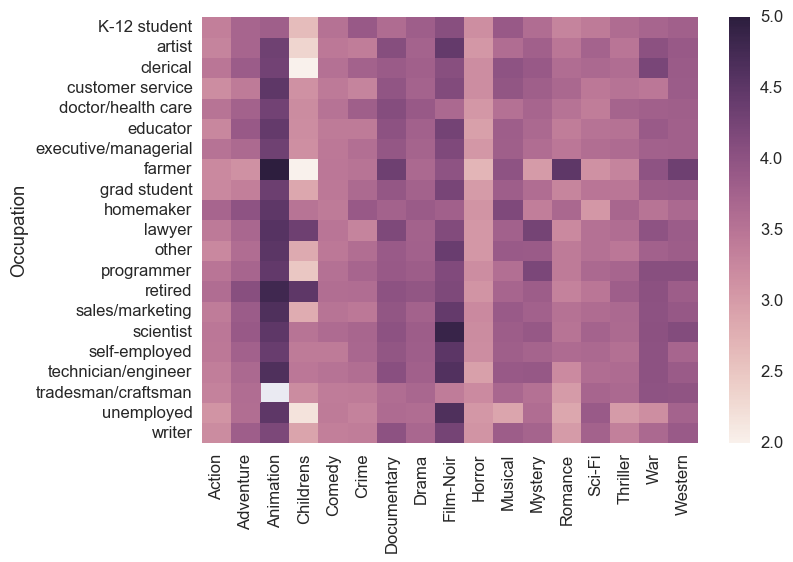

In [77]:
# Visualization of Genres, Occupations and Ratings
data = pd.pivot_table(ratingsWithUniqueGenres,index=["Occupation"],columns=['Genres'],values=["Rating"],aggfunc=[np.mean])
data
columns = ['Action','Adventure','Animation','Childrens','Comedy','Crime',
'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
data.columns = columns
data = data.drop('Fantasy', 1)
sns.heatmap(data)
